In [8]:
import pandas as pd
import ast

In [9]:
df_1 = pd.read_csv("CML_prob.csv")


In [10]:
# loading dataset from LLM trainig

df5 = pd.read_csv("4epochs_mistral_external_test_predictions.csv")
df6 = pd.read_csv("4epochs_mistral_internaltest_predictions.csv")
df5.replace('die',0 , inplace=True)
df5.replace('survive',1 , inplace=True)
df6.replace('die',0 , inplace=True)
df6.replace('survive',1 , inplace=True)

In [11]:
df7 = pd.read_csv("test_external_zero_predictions.csv")

df8 = pd.read_csv("mstral_zero_predictions.csv")

df7.replace('die',0 , inplace=True)
df7.replace('survive',1 , inplace=True)
df8.replace('die',0 , inplace=True)
df8.replace('survive',1 , inplace=True)

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import ast

# External Validation Data
lr_true_ex = ast.literal_eval(df_1.loc[0, "y_true_ex"])
lr_pred_ex = ast.literal_eval(df_1.loc[0, "y_pred_proba_external"])

svm_true_ex = ast.literal_eval(df_1.loc[1, "y_true_ex"])
svm_pred_ex = ast.literal_eval(df_1.loc[1, "y_pred_proba_external"])

tree_true_ex = ast.literal_eval(df_1.loc[2, "y_true_ex"])
tree_pred_ex = ast.literal_eval(df_1.loc[2, "y_pred_proba_external"])

knn_true_ex = ast.literal_eval(df_1.loc[3, "y_true_ex"])
knn_pred_ex = ast.literal_eval(df_1.loc[3, "y_pred_proba_external"])

forest_true_ex = ast.literal_eval(df_1.loc[4, "y_true_ex"])
forest_pred_ex = ast.literal_eval(df_1.loc[4, "y_pred_proba_external"])

boost_true_ex = ast.literal_eval(df_1.loc[5, "y_true_ex"])
boost_pred_ex = ast.literal_eval(df_1.loc[5, "y_pred_proba_external"])

neural_true_ex = ast.literal_eval(df_1.loc[6, "y_true_ex"])
neural_pred_ex = ast.literal_eval(df_1.loc[6, "y_pred_proba_external"])
# Internal Validation Data
lr_true_in = ast.literal_eval(df_1.loc[0, "y_true"])
lr_pred_in = ast.literal_eval(df_1.loc[0, "y_pred_proba_test"])

svm_true_in = ast.literal_eval(df_1.loc[1, "y_true"])
svm_pred_in = ast.literal_eval(df_1.loc[1, "y_pred_proba_test"])

tree_true_in = ast.literal_eval(df_1.loc[2, "y_true"])
tree_pred_in = ast.literal_eval(df_1.loc[2, "y_pred_proba_test"])

knn_true_in = ast.literal_eval(df_1.loc[3, "y_true"])
knn_pred_in = ast.literal_eval(df_1.loc[3, "y_pred_proba_test"])

forest_true_in = ast.literal_eval(df_1.loc[4, "y_true"])
forest_pred_in = ast.literal_eval(df_1.loc[4, "y_pred_proba_test"])

boost_true_in = ast.literal_eval(df_1.loc[5, "y_true"])
boost_pred_in = ast.literal_eval(df_1.loc[5, "y_pred_proba_test"])

neural_true_in = ast.literal_eval(df_1.loc[6, "y_true"])
neural_pred_in = ast.literal_eval(df_1.loc[6, "y_pred_proba_test"])

In [13]:

LLM_true_ex = df5.loc[:, "y_true"]
LLM_prd_ex = df5.loc[:, "y_pred"]



LLM_true_in = df6.loc[:, "y_true"]
LLM_prd_in = df6.loc[:, "y_pred"]


zero_true_ex = df7.loc[:, "y_true"]
zero_prd_ex = df7.loc[:, "y_pred"]

zero_true_in = df8.loc[:, "y_true"]
zero_prd_in = df8.loc[:, "y_pred"]



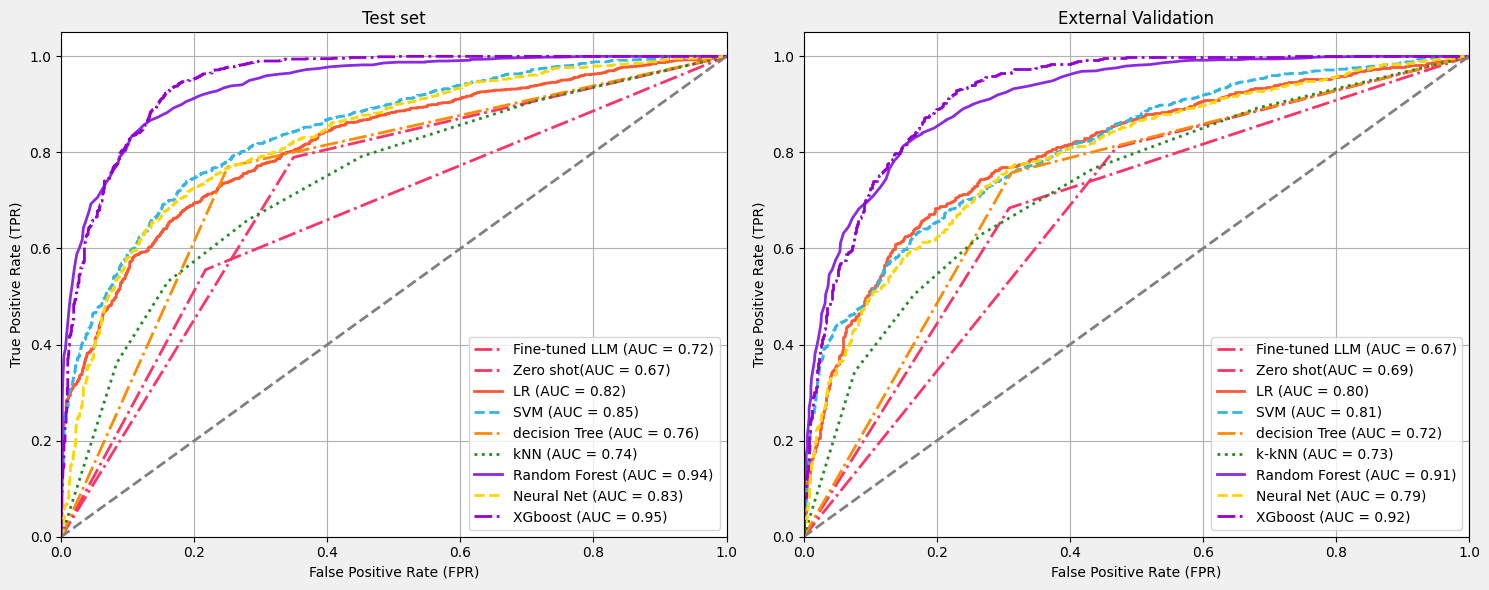

In [14]:

# Compute ROC curves and AUCs for external validation
fpr_lr_ex, tpr_lr_ex, _ = roc_curve(lr_true_ex, lr_pred_ex)
fpr_svm_ex, tpr_svm_ex, _ = roc_curve(svm_true_ex, svm_pred_ex)
fpr_tree_ex, tpr_tree_ex, _ = roc_curve(tree_true_ex, tree_pred_ex)
fpr_knn_ex, tpr_knn_ex, _ = roc_curve(knn_true_ex, knn_pred_ex)
fpr_forest_ex, tpr_forest_ex, _ = roc_curve(forest_true_ex, forest_pred_ex)
fpr_neural_ex, tpr_neural_ex, _ = roc_curve(neural_true_ex, neural_pred_ex)
fpr_boost_ex, tpr_boost_ex, _ = roc_curve(boost_true_ex, boost_pred_ex)
#fpre2, tpre2, _ = roc_curve(vector_true_ex, vector_prd_ex)
fpre3, tpre3, _ = roc_curve(LLM_true_ex, LLM_prd_ex)
fpre4, tpre4, _ = roc_curve(zero_true_ex, zero_prd_ex)

roc_auc_lr_ex = auc(fpr_lr_ex, tpr_lr_ex)
roc_auc_svm_ex = auc(fpr_svm_ex, tpr_svm_ex)
roc_auc_tree_ex = auc(fpr_tree_ex, tpr_tree_ex)
roc_auc_knn_ex = auc(fpr_knn_ex, tpr_knn_ex)
roc_auc_forest_ex = auc(fpr_forest_ex, tpr_forest_ex)
roc_auc_neural_ex = auc(fpr_neural_ex, tpr_neural_ex)
roc_auc_boost_ex = auc(fpr_boost_ex, tpr_boost_ex)
#roc_auce2 = auc(fpre2, tpre2)
roc_auce3 = auc(fpre3, tpre3)
roc_auce4 = auc(fpre4, tpre4)

# Compute ROC curves and AUCs for internal validation
fpr_lr_in, tpr_lr_in, _ = roc_curve(lr_true_in, lr_pred_in)
fpr_svm_in, tpr_svm_in, _ = roc_curve(svm_true_in, svm_pred_in)
fpr_tree_in, tpr_tree_in, _ = roc_curve(tree_true_in, tree_pred_in)
fpr_knn_in, tpr_knn_in, _ = roc_curve(knn_true_in, knn_pred_in)
fpr_forest_in, tpr_forest_in, _ = roc_curve(forest_true_in, forest_pred_in)
fpr_neural_in, tpr_neural_in, _ = roc_curve(neural_true_in, neural_pred_in)
fpr_boost_in, tpr_boost_in, _ = roc_curve(boost_true_in, boost_pred_in)
#fpri2, tpri2, _ = roc_curve(vector_true_in, vector_prd_in)
fpri3, tpri3, _ = roc_curve(LLM_true_in, LLM_prd_in)
fpri4, tpri4, _ = roc_curve(zero_true_in, zero_prd_in)

roc_auc_lr_in = auc(fpr_lr_in, tpr_lr_in)
roc_auc_svm_in = auc(fpr_svm_in, tpr_svm_in)
roc_auc_tree_in = auc(fpr_tree_in, tpr_tree_in)
roc_auc_knn_in = auc(fpr_knn_in, tpr_knn_in)
roc_auc_forest_in = auc(fpr_forest_in, tpr_forest_in)
roc_auc_neural_in = auc(fpr_neural_in, tpr_neural_in)
roc_auc_boost_in = auc(fpr_boost_in, tpr_boost_in)
#roc_auci2 = auc(fpri2, tpri2)
roc_auci3 = auc(fpri3, tpri3)
roc_auci4 = auc(fpri4, tpri4)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.patch.set_facecolor('#F0F0F0') 


# ... continued from previous code snippet
# Set plot properties for external validation
#axes[1].plot(fpre2, tpre2, color='#33B5E5', lw=2, linestyle='--', markersize=8, label=f'Vector search (AUC = {roc_auce2:.2f})')
axes[1].plot(fpre3, tpre3, color='#FF3366', lw=2, linestyle='-.', markersize=8, label=f'Fine-tuned LLM (AUC = {roc_auce3:.2f})')
axes[1].plot(fpre4, tpre4, color='#FB3366', lw=2, linestyle='-.', markersize=8, label=f'Zero shot(AUC = {roc_auce4:.2f})')
axes[1].plot(fpr_lr_ex, tpr_lr_ex, color='#FF5733', lw=2, linestyle='-', markersize=8, label=f'LR (AUC = {roc_auc_lr_ex:.2f})')
axes[1].plot(fpr_svm_ex, tpr_svm_ex, color='#33B5E5', lw=2, linestyle='--', markersize=8, label=f'SVM (AUC = {roc_auc_svm_ex:.2f})')
axes[1].plot(fpr_tree_ex, tpr_tree_ex, color='#FF8C00', lw=2, linestyle='-.', markersize=8, label=f'decision Tree (AUC = {roc_auc_tree_ex:.2f})')
axes[1].plot(fpr_knn_ex, tpr_knn_ex, color='#228B22', lw=2, linestyle=':', markersize=8, label=f'k-kNN (AUC = {roc_auc_knn_ex:.2f})')
axes[1].plot(fpr_forest_ex, tpr_forest_ex,color='#8A2BE2', lw=2, linestyle='-', markersize=8, label=f'Random Forest (AUC = {roc_auc_forest_ex:.2f})')
axes[1].plot(fpr_neural_ex, tpr_neural_ex, color='#FFD700', lw=2, linestyle='--', markersize=8, label=f'Neural Net (AUC = {roc_auc_neural_ex:.2f})')
axes[1].plot(fpr_boost_ex, tpr_boost_ex, color='#9400D3', lw=2, linestyle='-.', markersize=8, label=f'XGboost (AUC = {roc_auc_boost_ex:.2f})')

# Set plot properties for external validation
axes[1].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate (FPR)')
axes[1].set_ylabel('True Positive Rate (TPR)')
axes[1].set_title('External Validation')
axes[1].legend(loc='lower right')
axes[1].grid(True)

# Plot ROC curves for internal validation
#axes[0].plot(fpri2, tpri2, color='#33B5E5', lw=2, linestyle='--', markersize=8, label=f'Vector search (AUC = {roc_auci2:.2f})')
axes[0].plot(fpri3, tpri3, color='#FF3366', lw=2, linestyle='-.', markersize=8, label=f'Fine-tuned LLM (AUC = {roc_auci3:.2f})')
axes[0].plot(fpri4, tpri4, color='#FB3366', lw=2, linestyle='-.', markersize=8, label=f'Zero shot(AUC = {roc_auci4:.2f})')
axes[0].plot(fpr_lr_in, tpr_lr_in, color='#FF5733', lw=2, linestyle='-', markersize=8, label=f'LR (AUC = {roc_auc_lr_in:.2f})')
axes[0].plot(fpr_svm_in, tpr_svm_in, color='#33B5E5', lw=2, linestyle='--', markersize=8, label=f'SVM (AUC = {roc_auc_svm_in:.2f})')
axes[0].plot(fpr_tree_in, tpr_tree_in, color='#FF8C00', lw=2, linestyle='-.', markersize=8, label=f'decision Tree (AUC = {roc_auc_tree_in:.2f})')
axes[0].plot(fpr_knn_in, tpr_knn_in, color='#228B22', lw=2, linestyle=':', markersize=8, label=f'kNN (AUC = {roc_auc_knn_in:.2f})')
axes[0].plot(fpr_forest_in, tpr_forest_in, color='#8A2BE2', lw=2, linestyle='-',  markersize=8, label=f'Random Forest (AUC = {roc_auc_forest_in:.2f})')
axes[0].plot(fpr_neural_in, tpr_neural_in, color='#FFD700', lw=2, linestyle='--', markersize=8, label=f'Neural Net (AUC = {roc_auc_neural_in:.2f})')
axes[0].plot(fpr_boost_in, tpr_boost_in, color='#9400D3', lw=2, linestyle='-.', markersize=8, label=f'XGboost (AUC = {roc_auc_boost_in:.2f})')

# Set plot properties for internal validation
axes[0].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate (FPR)')
axes[0].set_ylabel('True Positive Rate (TPR)')
axes[0].set_title('Test set')
axes[0].legend(loc='lower right')
axes[0].grid(True)

plt.tight_layout()
plt.show()
